**DATA UNDERSTANDING**

In [ ]:
import pandas as pd
df=pd.read_csv("/content/swiggydataset.csv")

In [ ]:
df.shape

(16712, 10)

In [ ]:
df.head()

,date,favorite_count,followers_count,friends_count,full_text,retweet_count,retweeted,screen_name,tweet_id,user_id
0,7/18/2019 22:47,0,82,219,@Mahi_2510 @swiggy_in The ultimate answer will...,0,False,syamantak1,1,"6,19,59,419"
1,7/18/2019 22:43,0,102,129,@SwiggyCares I hope so.,0,False,Bharatbbhushn,2,"14,32,84,383"
2,7/18/2019 22:37,0,102,129,@SwiggyCares I think you have the order detail...,0,False,Bharatbbhushn,3,"14,32,84,383"
3,7/18/2019 22:35,0,13,16,"@swiggy_in People are complaining here also, i...",0,False,taifkhalid01,4,"8,30,34,00,00,00,00,00,000"
4,7/18/2019 22:25,0,102,129,@SwiggyCares Do you even know the meaning of y...,0,False,Bharatbbhushn,5,"14,32,84,383"


In [ ]:
df.columns

Index(['date', 'favorite_count', 'followers_count', 'friends_count',
       'full_text', 'retweet_count', 'retweeted', 'screen_name', 'tweet_id',
       'user_id'],
      dtype='object')

In [ ]:
#descriptive statistics
df.describe()

,favorite_count,followers_count,friends_count,retweet_count
count,16712.000000,1.671200e+04,16712.000000,16712.000000
mean,0.554691,3.156743e+03,384.175383,0.142592
std,8.973908,9.161054e+04,1652.475629,3.890990
min,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,9.000000e+00,48.000000,0.000000
50%,0.000000,4.300000e+01,139.000000,0.000000
75%,0.000000,1.950000e+02,376.000000,0.000000
max,916.000000,6.823332e+06,155340.000000,487.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             16712 non-null  object
 1   favorite_count   16712 non-null  int64 
 2   followers_count  16712 non-null  int64 
 3   friends_count    16712 non-null  int64 
 4   full_text        16712 non-null  object
 5   retweet_count    16712 non-null  int64 
 6   retweeted        14384 non-null  object
 7   screen_name      16712 non-null  object
 8   tweet_id         16712 non-null  object
 9   user_id          16712 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.3+ MB


**DATA CLEANING**

In [ ]:
df.isna().sum() #Finding any null values in each column

date                  0
favorite_count        0
followers_count       0
friends_count         0
full_text             0
retweet_count         0
retweeted          2328
screen_name           0
tweet_id              0
user_id               0
dtype: int64

In [ ]:
df['retweeted'].unique() #Values in column 'retweeted' which has null values

array([False, nan], dtype=object)

In [ ]:
# Treating the Nulls

# When retweeted contains nulls and retweet_count is equal to 0 then its "false"
df.loc[(df['retweeted'].isnull()) & (df['retweet_count']==0), 'retweeted'] = False

# When retweeted contains nulls and retweet_count is more than or equal to 1 then its "True"
df.loc[(df['retweeted'].isnull()) & (df['retweet_count']>=1), 'retweeted'] = True


In [ ]:
# Firstly replacing all the Retweet that are "False" but showing retweet_count more than and equal to 0 to "True"
df.loc[(df['retweeted']==False) & (df['retweet_count']>=1),'retweeted']=True

In [ ]:
df['retweeted'].value_counts()

False    15734
True       978
Name: retweeted, dtype: int64

In [ ]:
df.isna().sum()

date               0
favorite_count     0
followers_count    0
friends_count      0
full_text          0
retweet_count      0
retweeted          0
screen_name        0
tweet_id           0
user_id            0
dtype: int64

In [ ]:
#Handling timestamp

In [ ]:
#timestamp splitting
df['Dates'] = pd.to_datetime(df['date']).dt.date
df['Time'] = pd.to_datetime(df['date']).dt.time
df[['year', 'month','day']] = df['Dates'].astype(str).str.split("-", expand = True)
df.drop(['date'], axis=1, inplace=True)

In [ ]:
#Handling full_text column

In [ ]:
x = df[["full_text"]]

In [ ]:
x["full_text"] = x["full_text"].astype(str)

<ipython-input-17-ea115d546de1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["full_text"] = x["full_text"].astype(str)


In [ ]:
import re                 ##imports the re module, which provides regular expression matching operations for pattern matching and text manipulation.
import nltk               ##imports the nltk library,stands for Natural Language Toolkit.NLTK is a popular library for natural language processing tasks,such as tokenization,stemming,lemmatization, and more.
import spacy              ##imports the spacy library,another powerful library for natural language processing.
import string
from nltk.tokenize import word_tokenize ##imports the word_tokenize function from the nltk.tokenize module.


In [ ]:
from nltk.corpus import stopwords  ##'stopwords' module allows you to access and use predefined stopword lists for various languages.
from nltk.stem import WordNetLemmatizer,PorterStemmer ##'WordNetLemmatizer' class from NLTK's stem module provides functionality for lemmatization,'PorterStemmer' is a widely used stemming algorithm that applies a set of rules to perform stemming.

In [ ]:
nltk.download('stopwords')  ##download the necessary stopwords
nltk.download('wordnet')  ##it fetches the WordNet data from the NLTK repository.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def clean_text(text):
    def remove_mentions(text):
        # Regular expression pattern to match mentions
        mention_pattern = r'@[\w_]+'

        # Remove mentions using regular expression substitution
        cleaned_text = re.sub(mention_pattern, '', text)

        return cleaned_text

    # Remove mentions from the text
    text = remove_mentions(text)

    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Handling contractions
    contractions = {
        "n't": "not",
        "'s": "is",
        "'re": "are",
        "'ve": "have"

    }
    tokens = [contractions[token] if token in contractions else token for token in tokens]

    # Removing stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stemming
    #stemmer = PorterStemmer()
    #tokens = [stemmer.stem(token) for token in tokens]

    return tokens

x['cleaned_full_text'] = x['full_text'].apply(clean_text)


<ipython-input-22-19ae766c15a6>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cleaned_full_text'] = x['full_text'].apply(clean_text)


In [ ]:
x['cleaned_full_text'].head()

0       [ultimate, answer, b, sorry, ..., assure, ...]
1                                               [hope]
2    [think, order, detail, number, present, yea, c...
3    [people, complaining, also, know, little, disa...
4    [even, know, meaning, tagline, dm, wo, work, w...
Name: cleaned_full_text, dtype: object

In [ ]:
x['cleaned_full_text'][0]

['ultimate', 'answer', 'b', 'sorry', '...', 'assure', '...']

In [ ]:
df['cleaned_full_text'] = x['cleaned_full_text']

In [ ]:
df.head()

,favorite_count,followers_count,friends_count,full_text,retweet_count,retweeted,screen_name,tweet_id,user_id,Dates,Time,year,month,day,cleaned_full_text
0,0,82,219,@Mahi_2510 @swiggy_in The ultimate answer will...,0,False,syamantak1,1,"6,19,59,419",2019-07-18,22:47:00,2019,07,18,"[ultimate, answer, b, sorry, ..., assure, ...]"
1,0,102,129,@SwiggyCares I hope so.,0,False,Bharatbbhushn,2,"14,32,84,383",2019-07-18,22:43:00,2019,07,18,[hope]
2,0,102,129,@SwiggyCares I think you have the order detail...,0,False,Bharatbbhushn,3,"14,32,84,383",2019-07-18,22:37:00,2019,07,18,"[think, order, detail, number, present, yea, c..."
3,0,13,16,"@swiggy_in People are complaining here also, i...",0,False,taifkhalid01,4,"8,30,34,00,00,00,00,00,000",2019-07-18,22:35:00,2019,07,18,"[people, complaining, also, know, little, disa..."
4,0,102,129,@SwiggyCares Do you even know the meaning of y...,0,False,Bharatbbhushn,5,"14,32,84,383",2019-07-18,22:25:00,2019,07,18,"[even, know, meaning, tagline, dm, wo, work, w..."


In [ ]:
df.drop(['full_text'], axis=1, inplace=True) #dropping actual column because cleaned_full_text has cleaned text

In [ ]:
df.head()

,favorite_count,followers_count,friends_count,retweet_count,retweeted,screen_name,tweet_id,user_id,Dates,Time,year,month,day,cleaned_full_text
0,0,82,219,0,False,syamantak1,1,"6,19,59,419",2019-07-18,22:47:00,2019,07,18,"[ultimate, answer, b, sorry, ..., assure, ...]"
1,0,102,129,0,False,Bharatbbhushn,2,"14,32,84,383",2019-07-18,22:43:00,2019,07,18,[hope]
2,0,102,129,0,False,Bharatbbhushn,3,"14,32,84,383",2019-07-18,22:37:00,2019,07,18,"[think, order, detail, number, present, yea, c..."
3,0,13,16,0,False,taifkhalid01,4,"8,30,34,00,00,00,00,00,000",2019-07-18,22:35:00,2019,07,18,"[people, complaining, also, know, little, disa..."
4,0,102,129,0,False,Bharatbbhushn,5,"14,32,84,383",2019-07-18,22:25:00,2019,07,18,"[even, know, meaning, tagline, dm, wo, work, w..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   favorite_count     16712 non-null  int64 
 1   followers_count    16712 non-null  int64 
 2   friends_count      16712 non-null  int64 
 3   retweet_count      16712 non-null  int64 
 4   retweeted          16712 non-null  object
 5   screen_name        16712 non-null  object
 6   tweet_id           16712 non-null  object
 7   user_id            16712 non-null  object
 8   Dates              16712 non-null  object
 9   Time               16712 non-null  object
 10  year               16712 non-null  object
 11  month              16712 non-null  object
 12  day                16712 non-null  object
 13  cleaned_full_text  16712 non-null  object
dtypes: int64(4), object(10)
memory usage: 1.8+ MB


**Exploratory Data Analysis**

In [ ]:
df['Dates'].min(),df['Dates'].max()

(datetime.date(2019, 6, 1), datetime.date(2019, 7, 18))

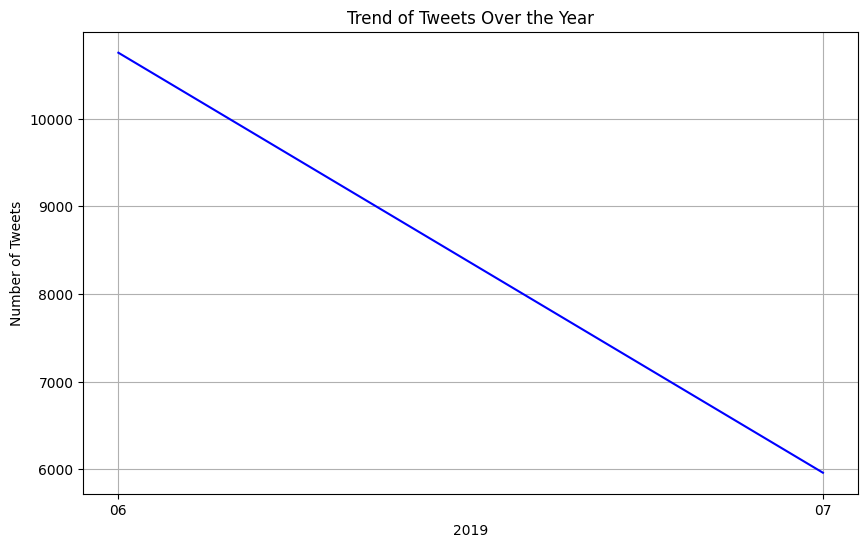

In [ ]:
import matplotlib.pyplot as plt
# Group by 'year' and count the number of tweets for each year
tweets_by_year = df['month'].value_counts().sort_index()

# Plot the tweet count for each year
plt.figure(figsize=(10, 6))
plt.plot(tweets_by_year.index, tweets_by_year.values, color='blue')
plt.xlabel('2019')
plt.ylabel('Number of Tweets')
plt.title('Trend of Tweets Over the Year')
plt.xticks(ticks=tweets_by_year.index, labels=tweets_by_year.index)
plt.grid(True)
plt.show()


Maximum number of tweets: 908
Date with the maximum number of tweets: 2019-06-02


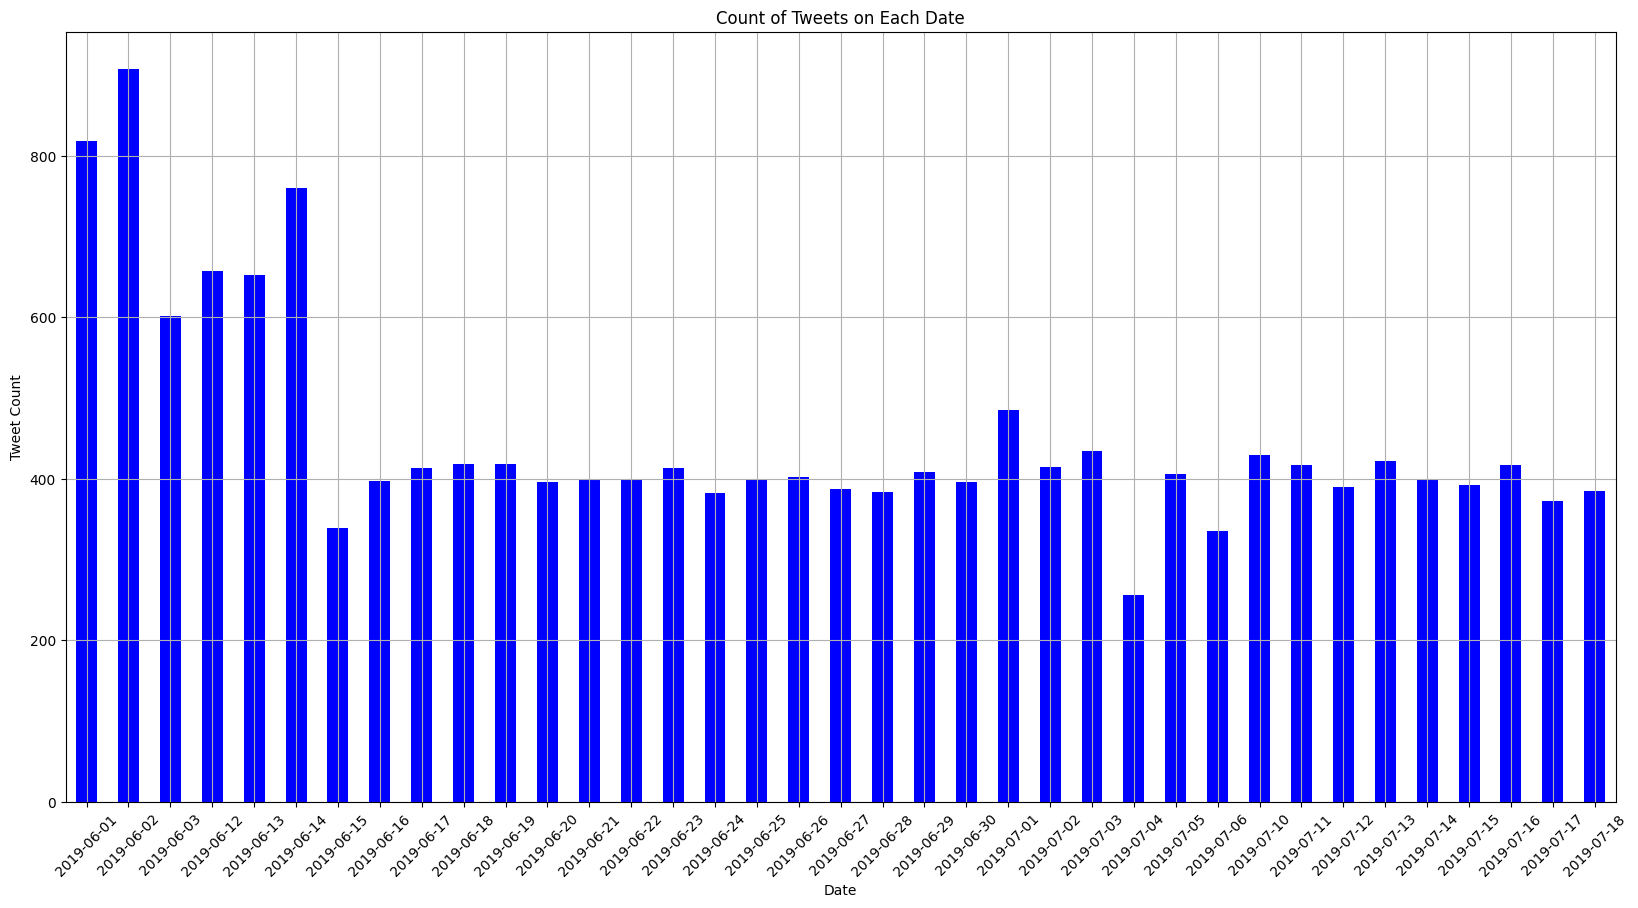

In [ ]:
# Group by 'Dates' and count the number of tweets for each date
tweets_by_date = df['Dates'].value_counts().sort_index()

# Plot the tweet count for each date
plt.figure(figsize=(20, 10))
tweets_by_date.plot.bar(title='Count of Tweets on Each Date', color='blue')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.grid()

# Find the date with the maximum number of tweets
max_tweets_date = tweets_by_date.idxmax()
max_tweets_count = tweets_by_date.max()

# Print the results
print(f"Maximum number of tweets: {max_tweets_count}")
print(f"Date with the maximum number of tweets: {max_tweets_date}")

plt.show()




Conclusion: As we can see that most of the "Tweets" were posted on "2019-06-02"

Reasons can be as follows:

1. **Event/Festival**: A notable event, festival, or holiday could have triggered increased food orders and social media discussions.

2. **Product Update**: Swiggy launching a new feature, service, or partnering with a popular restaurant might have spurred more tweets and shares.

3. **Swiggy offer** : Swiggy provided any offers on that day.

In [ ]:
DATE_COUNT=df['Dates'].value_counts()
df_reg_count=pd.DataFrame(DATE_COUNT)
df_reg_count.rename({'JUST_DATE':'DATE_COUNT'},axis='columns',inplace=True)
df_reg_count.sort_index(ascending=True,inplace=True)
df_reg_count.head()

,Dates
2019-06-01,818
2019-06-02,908
2019-06-03,602
2019-06-12,657
2019-06-13,652


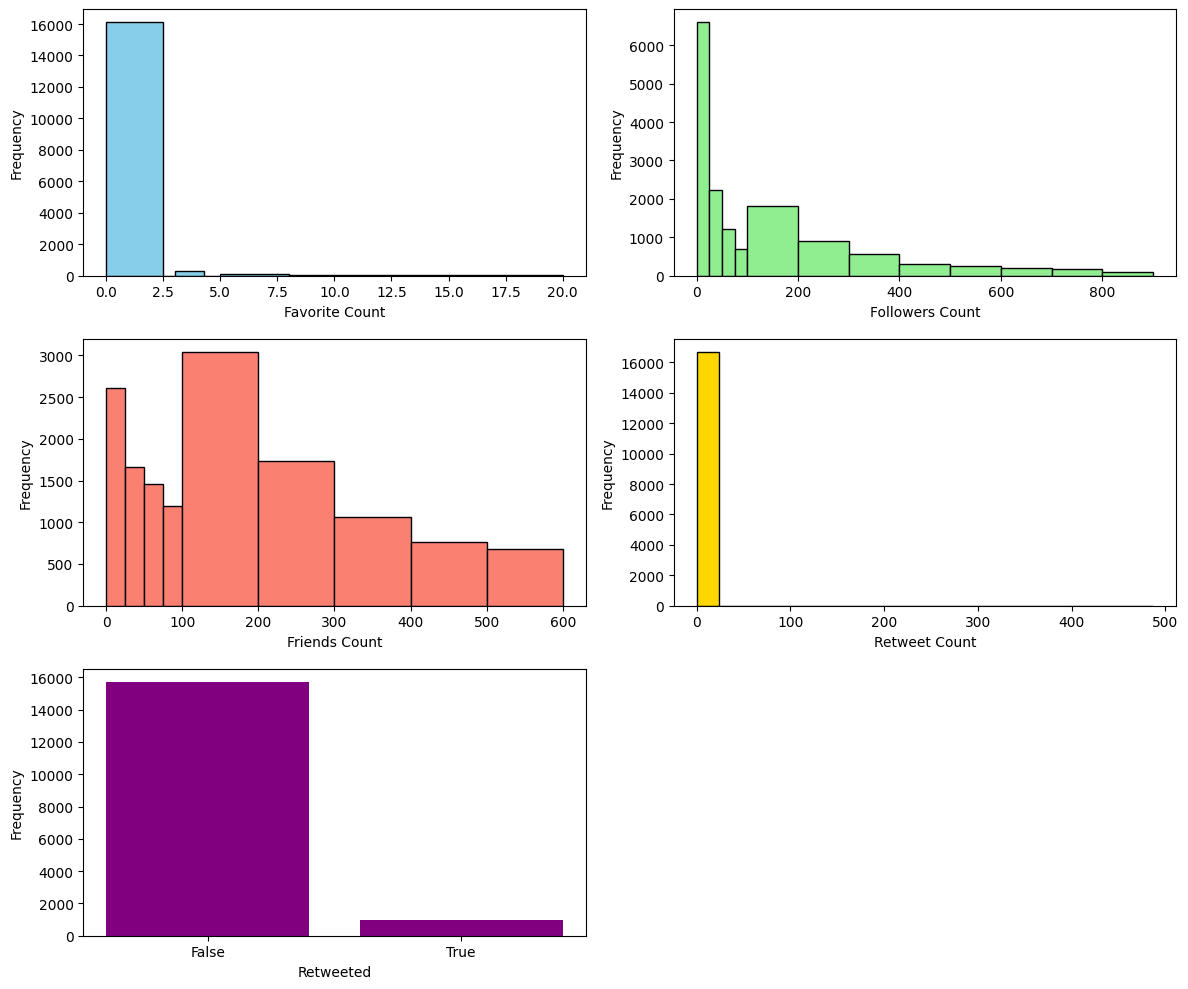

In [ ]:
# Convert object columns to numeric data types
df['favorite_count'] = pd.to_numeric(df['favorite_count'])
df['followers_count'] = pd.to_numeric(df['followers_count'])
df['friends_count'] = pd.to_numeric(df['friends_count'])
df['retweet_count'] = pd.to_numeric(df['retweet_count'])
df['retweeted'] = pd.to_numeric(df['retweeted'])


# Plot histograms for the numerical features
plt.figure(figsize=(12, 10))

# Plot histogram for favorite_count
plt.subplot(3, 2, 1)
plt.hist(df['favorite_count'], bins=[0,2.5,3,4.3,5,8,9,20], color='skyblue', edgecolor='black')
plt.xlabel('Favorite Count')
plt.ylabel('Frequency')

# Plot histogram for followers_count
plt.subplot(3, 2, 2)
plt.hist(df['followers_count'], bins=[0, 25, 50, 75, 100,200,300,400,500,600,700,800,900], color='lightgreen', edgecolor='black')
plt.xlabel('Followers Count')
plt.ylabel('Frequency')

# Plot histogram for friends_count
plt.subplot(3, 2, 3)
plt.hist(df['friends_count'], bins=[0, 25, 50, 75, 100,200,300,400,500,600], color='salmon', edgecolor='black')
plt.xlabel('Friends Count')
plt.ylabel('Frequency')

# Plot histogram for retweet_count
plt.subplot(3, 2, 4)
plt.hist(df['retweet_count'], bins=20, color='gold', edgecolor='black')
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')

# Plot bar plot for 'retweeted'
plt.subplot(3, 2, 5)
plt.bar(df['retweeted'].value_counts().index, df['retweeted'].value_counts().values, color='purple')
plt.xlabel('Retweeted')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['False', 'True'])

plt.tight_layout()
plt.show()


<Axes: >

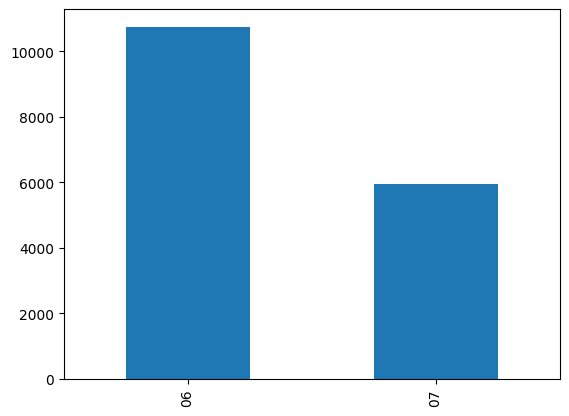

In [ ]:
# finding the months
df['month'].value_counts().plot.bar()

## From this visualization, we can infer that this dataset may have been extracted between June and July.

Maximum number of tweets: 1323
Day with the maximum number of tweets: 02


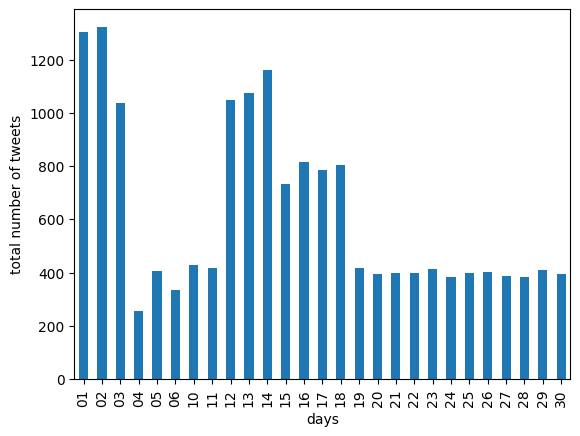

In [ ]:
## This shows on which days more tweets were posted, so that the Media team can be more active.
tweets_by_day = df['day'].value_counts().sort_index(ascending=True)
tweets_by_day.plot.bar()
max_tweets_day = tweets_by_day.idxmax()
max_tweets_count_day = tweets_by_day.max()
plt.xlabel("days")
plt.ylabel("total number of tweets")

# Print the results
print(f"Maximum number of tweets: {max_tweets_count_day}")
print(f"Day with the maximum number of tweets: {max_tweets_day}")



In [ ]:
df['screen_name'].value_counts().head(3)

SandipThink        71
SwiggyCares        70
Vineeta75481990    53
Name: screen_name, dtype: int64

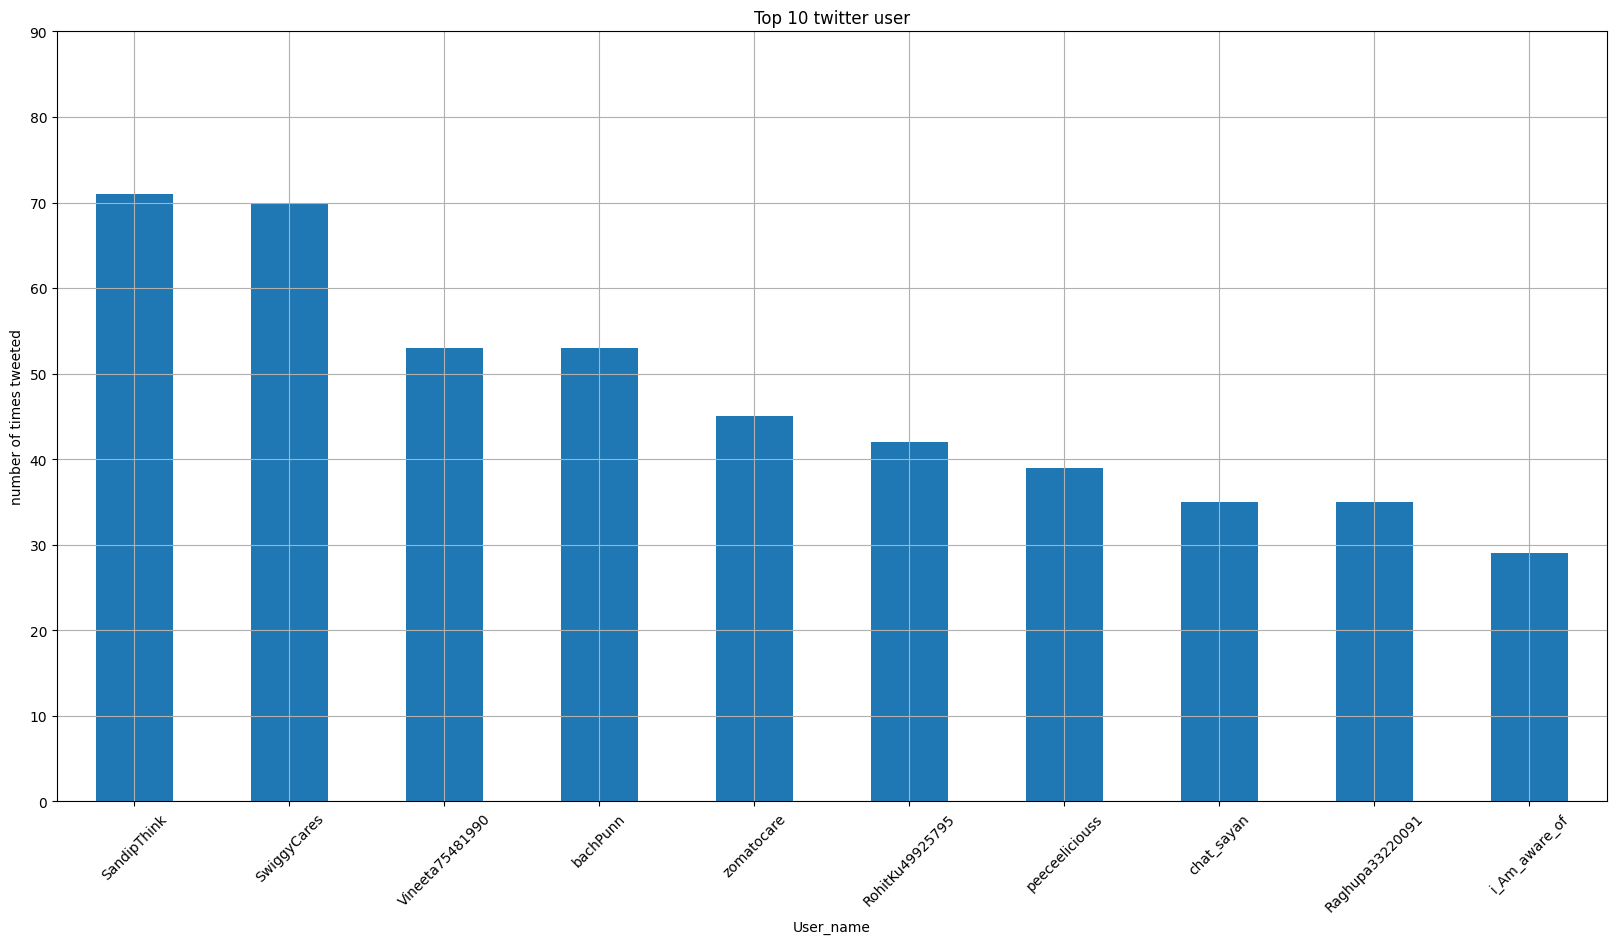

In [ ]:
###  Top 10 twitter user and number of times they tweeted
plt.figure(figsize = (20,10))
df.groupby(['screen_name'])['screen_name'].size().sort_values(ascending= False).head(10).plot(kind='bar')
plt.xlabel('User_name')
plt.xticks(rotation = 45)
plt.ylim(0,90)
plt.ylabel('number of times tweeted')
plt.title('Top 10 twitter user')
plt.grid()

In [ ]:
for i in df[df['screen_name']=='SandipThink']['cleaned_full_text'].head(7):
    print(i)

['already', 'stopped', 'using']
['due', 'stopped', 'using']
['give', 'copy', 'paste', 'reply', 'everything', 'without', 'providing', 'resolution']
['expect', 'good', 'service', '..', 'assure', 'improving', 'service', 'future', 'keep', 'repeating', 'mistake']
["'m", 'initiating', 'dm']
['already', 'shared', 'detail', 'many', 'time', 'last', 'month', '...', 'patience', 'time', 'share', 'detail', 'convenience']
['expect', 'good', 'service', '...', 'contradict', 'statement', 'customer', 'suffer', 'poor', 'service', '..', 'better', 'look', 'alternative']


Observation: "SandipThink" has tweeted the most regarding the performance of Swiggy.If there are any issues,the Swiggy team should promptly address these issues and ensure that other customers do not face similar problems in the future.

<Axes: >

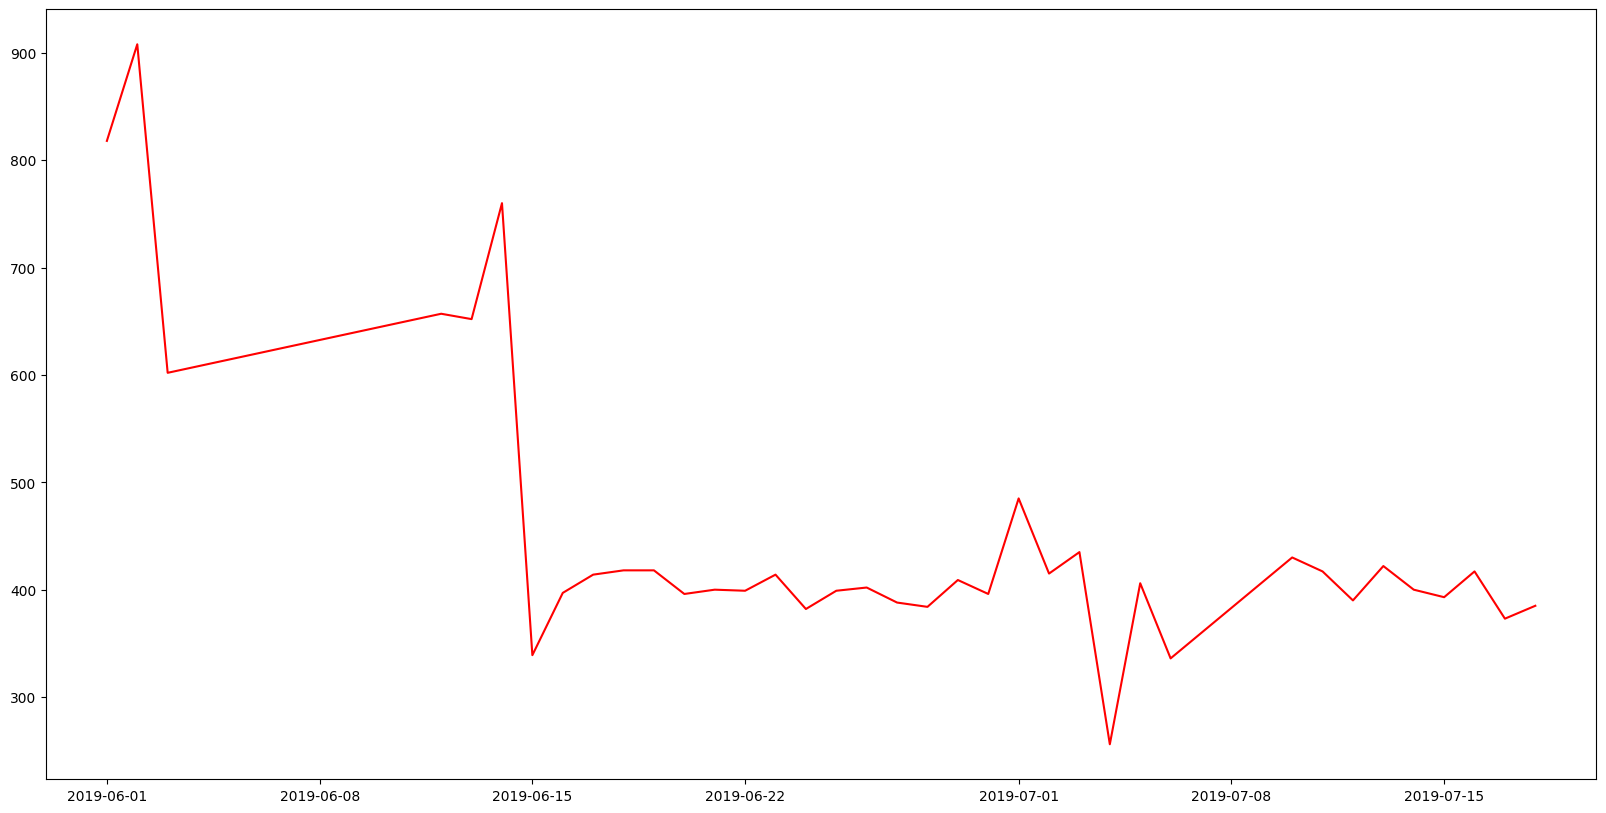

In [ ]:
# To understand the trend in the data
df_reg_count['Dates'].plot(xlim=['2019-05-30','2019-7-20'],figsize=(20,10),color='r')

Conclusion:
1. Market Saturation: As Swiggy becomes more established, the initial rapid growth in tweet activity may naturally slow down due to market saturation.
2. Seasonal Trends: Tweet volumes may fluctuate based on seasonal factors, such as holidays or vacation periods, impacting overall trends.
3. Competition Impact: Increased competition from other food delivery services may divert customer attention and reduce Swiggy-related tweet activity.
4. Service Quality Fluctuations: Changes in service quality or occasional issues may lead to varying tweet volumes as customers express their experiences.
5. Customer Loyalty: Over time, loyal customers may become accustomed to Swiggy's service, resulting in fewer tweets as the novelty wears off.

In [ ]:
df[df['friends_count']==df['friends_count'].max()]['screen_name']

2165    flywithsid
Name: screen_name, dtype: object

Observation: "flywithsid" has the most friends on Twitter

---



In [ ]:
df[df['followers_count']==df['followers_count'].max()][['screen_name','followers_count']]

,screen_name,followers_count
11480,htTweets,6823332


Observation: "htTweets" haS the most followers on Twitter

In [ ]:
from collections import Counter

all_words = [word for sublist in df['cleaned_full_text'] for word in sublist]

# Count the occurrences of each word
word_counts = Counter(all_words)

# Get the most common words and their counts
most_common_words = word_counts.most_common(10)  # Change '10' to get more or fewer words

# Print the most common words and their counts
for word, count in most_common_words:
    print(f'{word}: {count}')


order: 5878
swiggy: 3943
http: 3894
food: 2995
customer: 2925
delivery: 2864
service: 2403
..: 2308
...: 2004
time: 1803


A word cloud is a visual representation that displays the most frequent words in a text or collection of texts. The size of each word in the cloud corresponds to its frequency, with more prominent words indicating higher occurrence.

In [ ]:
all_words=[]
for i in df['cleaned_full_text']:
  review = i
  review=' '.join(review)                # joining the words to rearrage to form the sent without stop words
  all_words.append(review)

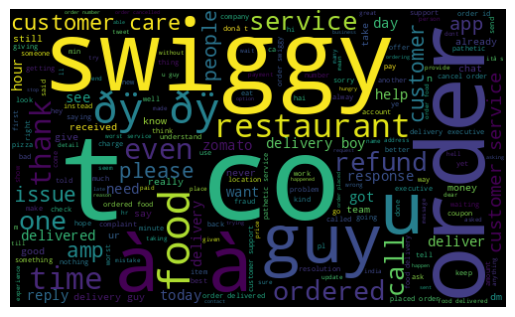

In [ ]:
#picturing the most used words
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Plot The Word Cloud
allWords=" ".join(all_words)
wordCloud = WordCloud(width =500, height=300, random_state=21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

**SENTIMENT ANALYSIS**

In [ ]:
df_new=df.drop(['favorite_count', 'followers_count', 'friends_count','retweet_count', 'retweeted', 'screen_name', 'tweet_id','user_id','Time','year','month','day'],axis=1)
df_new.head(5)

,Dates,cleaned_full_text
0,2019-07-18,"[ultimate, answer, b, sorry, ..., assure, ...]"
1,2019-07-18,[hope]
2,2019-07-18,"[think, order, detail, number, present, yea, c..."
3,2019-07-18,"[people, complaining, also, know, little, disa..."
4,2019-07-18,"[even, know, meaning, tagline, dm, wo, work, w..."


In [ ]:
# Save the DataFrame to a CSV file
output_file2 = 'output_file.csv'
df_new.to_csv(output_file2, index=False)  # Set index=False to avoid saving the DataFrame index as a separate column


In [ ]:
from textblob import TextBlob

In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

df_new['polarity_score'] = df_new['cleaned_full_text'].apply(lambda x : polarity(str(x)))

def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'

df_new['polarity'] = df_new['polarity_score'].map(lambda x: sentiment(x))

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=df_new['polarity'].value_counts().index.tolist(),
                             values=df_new['polarity'].value_counts().tolist(),
                            marker=dict(colors=['#006400','#8B0001','#add8e3']))])

fig.update_layout(title_text='Proportion of Sentiments',title_x=0.5,
                  template='plotly_white')
fig.show()

Observation:The above pie chart shows us the proportion of "positive," "negative," and "neutral" comments from customers where Swiggy can improve its facilities.

Clustering the tweets into various themes such as Positive,Negative & Neutral

In [ ]:
df_new

,Dates,cleaned_full_text,polarity_score,polarity
0,2019-07-18,"[ultimate, answer, b, sorry, ..., assure, ...]",-0.250000,negative
1,2019-07-18,[hope],0.000000,neutral
2,2019-07-18,"[think, order, detail, number, present, yea, c...",0.142857,positive
3,2019-07-18,"[people, complaining, also, know, little, disa...",0.010417,positive
4,2019-07-18,"[even, know, meaning, tagline, dm, wo, work, w...",0.000000,neutral
...,...,...,...,...
16707,2019-07-11,"[said, delivery, box, ready, deliver, cancelin...",0.150000,positive
16708,2019-07-11,"[deliver, karta, nahi, install, kyo, karenðÿ˜¡]",0.000000,neutral
16709,2019-07-11,"[thanks, spilling, drink, waited, call, inform...",-0.150000,negative
16710,2019-07-11,"[hello, use, swigggy, regularly, order, food, ...",0.000000,neutral


In [ ]:
def get_data(df_new,senti):
    senti_df = df_new[df_new['polarity']==senti].reset_index()
    return senti_df
p_corpus = get_data(df_new,'positive')
p_corpus=pd.DataFrame(p_corpus)

n_corpus = get_data(df_new,'negative')
n_corpus=pd.DataFrame(n_corpus)

nt_corpus = get_data(df_new,'neutral')
nt_corpus=pd.DataFrame(nt_corpus)

In [ ]:
p_corpus.shape,n_corpus.shape,nt_corpus.shape

((5336, 5), (5227, 5), (6149, 5))

In [ ]:
df_new.drop('polarity_score',axis=1,inplace=True)
df_new.rename(columns={"polarity": "Sentiment"},inplace=True)
df_new.head()

,Dates,cleaned_full_text,Sentiment
0,2019-07-18,"[ultimate, answer, b, sorry, ..., assure, ...]",negative
1,2019-07-18,[hope],neutral
2,2019-07-18,"[think, order, detail, number, present, yea, c...",positive
3,2019-07-18,"[people, complaining, also, know, little, disa...",positive
4,2019-07-18,"[even, know, meaning, tagline, dm, wo, work, w...",neutral


In [ ]:
output_file2 = 'output_file1.csv'
df_new.to_csv(output_file2, index=False)

In [ ]:
# Label Encoding "Sentiment" Column

df_new['Sentiment']=df_new['Sentiment'].replace(to_replace=['negative', 'neutral', 'positive'],value=[0,1,2])
df_new.head()

,Dates,cleaned_full_text,Sentiment
0,2019-07-18,"[ultimate, answer, b, sorry, ..., assure, ...]",0
1,2019-07-18,[hope],1
2,2019-07-18,"[think, order, detail, number, present, yea, c...",2
3,2019-07-18,"[people, complaining, also, know, little, disa...",2
4,2019-07-18,"[even, know, meaning, tagline, dm, wo, work, w...",1


**Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
corpus=[]
for i in df_new['cleaned_full_text']:
  review = i
  review=' '.join(review)                # joining the words to rearrage to form the sent without stop words
  corpus.append(review)

1:Using Bag of Words

In [ ]:
# Converting the Words to Vector using Bag of words

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500,ngram_range=(1,3)) # top 2500 features are taken
X=cv.fit_transform(corpus).toarray()
y=df_new['Sentiment']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

In [ ]:
#Naive Bayes Model

from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
MultinomialNB()
train_pred=nb.predict(x_train)
test_pred=nb.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1073
           1       0.74      0.80      0.77      1135
           2       0.78      0.73      0.75      1135

    accuracy                           0.76      3343
   macro avg       0.76      0.76      0.76      3343
weighted avg       0.76      0.76      0.76      3343



In [ ]:
#Random Forest Model

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
RandomForestClassifier()
train_pred=rfc.predict(x_train)
test_pred=rfc.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       938
           1       0.95      0.81      0.87      1446
           2       0.79      0.88      0.84       959

    accuracy                           0.85      3343
   macro avg       0.84      0.86      0.85      3343
weighted avg       0.86      0.85      0.85      3343



In [ ]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)
LinearSVC()
train_pred=SVCmodel.predict(x_train)
test_pred = SVCmodel.predict(x_test)
print(classification_report(test_pred,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1006
           1       0.94      0.89      0.91      1300
           2       0.86      0.89      0.88      1037

    accuracy                           0.89      3343
   macro avg       0.89      0.89      0.89      3343
weighted avg       0.89      0.89      0.89      3343



In [ ]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(x_train, y_train)
LogisticRegression()
train_pred=LRmodel.predict(x_train)
test_pred = LRmodel.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       987
           1       0.94      0.87      0.91      1327
           2       0.85      0.88      0.86      1029

    accuracy                           0.88      3343
   macro avg       0.88      0.88      0.88      3343
weighted avg       0.88      0.88      0.88      3343



Conclusion: Here we get a very good Model using 'Bag Of words' but Still the Semantic meaning will be missing So, to overcome this problem we are further going for TF-IDF Technique

2: Using Term Frequency-Inverse Document Frequency

In [ ]:
# Converting the Words to Vector using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(ngram_range=(1,3),max_features=3000)
X=tf.fit_transform(corpus).toarray()
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

In [ ]:
# Naive Bayes Model

nb.fit(x_train,y_train)
MultinomialNB()
train_pred=nb.predict(x_train)
test_pred=nb.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1031
           1       0.80      0.77      0.78      1272
           2       0.75      0.77      0.76      1040

    accuracy                           0.77      3343
   macro avg       0.77      0.77      0.77      3343
weighted avg       0.77      0.77      0.77      3343



In [ ]:
# Random Forest Model

rfc.fit(x_train,y_train)
RandomForestClassifier(n_estimators=[200],criterion='entropy',max_depth=[5,10,20,25])
train_pred=rfc.predict(x_train)
test_pred=rfc.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       965
           1       0.93      0.79      0.85      1434
           2       0.77      0.87      0.82       944

    accuracy                           0.83      3343
   macro avg       0.82      0.84      0.83      3343
weighted avg       0.84      0.83      0.83      3343



In [ ]:
SVCmodel.fit(x_train, y_train)
LinearSVC()
train_pred=SVCmodel.predict(x_train)
test_pred = SVCmodel.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       988
           1       0.96      0.87      0.91      1360
           2       0.85      0.91      0.88       995

    accuracy                           0.89      3343
   macro avg       0.89      0.90      0.89      3343
weighted avg       0.90      0.89      0.89      3343



In [ ]:
LRmodel.fit(x_train, y_train)
LogisticRegression()
train_pred=LRmodel.predict(x_train)
test_pred = LRmodel.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       951
           1       0.95      0.84      0.89      1399
           2       0.83      0.89      0.86       993

    accuracy                           0.87      3343
   macro avg       0.87      0.88      0.87      3343
weighted avg       0.88      0.87      0.87      3343



In [ ]:
# Xgboost  Model

from xgboost import XGBClassifier
XGB = XGBClassifier()

XGB.fit(x_train,y_train)
MultinomialNB()
train_pred=XGB.predict(x_train)
test_pred=XGB.predict(x_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       923
           1       0.98      0.82      0.89      1479
           2       0.81      0.91      0.86       941

    accuracy                           0.88      3343
   macro avg       0.87      0.89      0.87      3343
weighted avg       0.89      0.88      0.88      3343



In [ ]:
def sentiments(test_vec):
  if test_vec == 0:
    print("Negative")
  if test_vec == 1 :
    print("Neutral")
  if test_vec == 2 :
    print("Positive")

In [ ]:
print('Test 1')
test1 = ["Food was really good"]
test_vec = tf.transform(test1)
predict = SVCmodel.predict(test_vec)
print('The Predicted Rating is :',predict)
sentiments(predict)

Test 1
The Predicted Rating is : [2]
Positive


In [ ]:
print('Test 2')
test2 = ["natural icecream gave wrong address mistake cancelled order charged food wastage icecream tub returnable charged please help"]
test_vec = tf.transform(test2)
predict = SVCmodel.predict(test_vec)
print('The Predicted Rating is :',predict)
sentiments(predict)

Test 2
The Predicted Rating is : [0]
Negative


In [ ]:
print('Test 3')
test3 = ["Dear Swiggy, I am absolutely disappointed with all your delivery executives. In the past few weeks, all the executives who came to deliver my order had to call me more than twice to reach my location despite sharing the pin point Landmarks"]
predict = SVCmodel.predict(test_vec)
print('The Predicted Rating is :',predict)
sentiments(predict)

Test 3
The Predicted Rating is : [0]
Negative


Sentiment Analysis Using Bert

In [ ]:
df1 = pd.read_csv("/content/output_file1.csv")
df1

,Dates,cleaned_full_text,Sentiment
0,2019-07-18,"['ultimate', 'answer', 'b', 'sorry', '...', 'a...",negative
1,2019-07-18,['hope'],neutral
2,2019-07-18,"['think', 'order', 'detail', 'number', 'presen...",positive
3,2019-07-18,"['people', 'complaining', 'also', 'know', 'lit...",positive
4,2019-07-18,"['even', 'know', 'meaning', 'tagline', 'dm', '...",neutral
...,...,...,...
16707,2019-07-11,"['said', 'delivery', 'box', 'ready', 'deliver'...",positive
16708,2019-07-11,"['deliver', 'karta', 'nahi', 'install', 'kyo',...",neutral
16709,2019-07-11,"['thanks', 'spilling', 'drink', 'waited', 'cal...",negative
16710,2019-07-11,"['hello', 'use', 'swigggy', 'regularly', 'orde...",neutral


In [ ]:
df1['cleaned_full_text'] = [' '.join(map(str, l)) for l in df['cleaned_full_text']]
df1

,Dates,cleaned_full_text,Sentiment
0,2019-07-18,ultimate answer b sorry ... assure ...,negative
1,2019-07-18,hope,neutral
2,2019-07-18,think order detail number present yea call right,positive
3,2019-07-18,people complaining also know little disappoint...,positive
4,2019-07-18,even know meaning tagline dm wo work want expl...,neutral
...,...,...,...
16707,2019-07-11,said delivery box ready deliver canceling orde...,positive
16708,2019-07-11,deliver karta nahi install kyo karenðÿ˜¡,neutral
16709,2019-07-11,thanks spilling drink waited call inform drink...,negative
16710,2019-07-11,hello use swigggy regularly order food today a...,neutral


In [ ]:
possible_label = df1.Sentiment.unique()
dict_label = {}
for index,possible_label in enumerate(possible_label):
    dict_label[possible_label] = index
dict_label

{'negative': 0, 'neutral': 1, 'positive': 2}

In [ ]:
df1["Label"] = df1["Sentiment"].replace(dict_label)
df1.head()

,Dates,cleaned_full_text,Sentiment,Label
0,2019-07-18,ultimate answer b sorry ... assure ...,negative,0
1,2019-07-18,hope,neutral,1
2,2019-07-18,think order detail number present yea call right,positive,2
3,2019-07-18,people complaining also know little disappoint...,positive,2
4,2019-07-18,even know meaning tagline dm wo work want expl...,neutral,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df1.index.values,
                                                df1.Label.values,
                                                test_size = 0.15,
                                                random_state=17,
                                                stratify = df1.Label.values)

In [ ]:
df1.loc[X_train,'data_type'] = 'train'
df1.loc[X_test,'data_type'] = 'test'

In [ ]:
df1.head()

,Dates,cleaned_full_text,Sentiment,Label,data_type
0,2019-07-18,ultimate answer b sorry ... assure ...,negative,0,train
1,2019-07-18,hope,neutral,1,train
2,2019-07-18,think order detail number present yea call right,positive,2,train
3,2019-07-18,people complaining also know little disappoint...,positive,2,train
4,2019-07-18,even know meaning tagline dm wo work want expl...,neutral,1,test


In [ ]:
df1.groupby(['Sentiment','Label','data_type']).count()

Dates  cleaned_full_text
Sentiment Label data_type                          
negative  0     test         784                784
                train       4443               4443
neutral   1     test         922                922
                train       5227               5227
positive  2     test         801                801
                train       4535               4535

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.8 MB/s eta 0:00:00


## **Modeling**

In [ ]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
import torch
from sklearn import metrics

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                         do_lower_case = True)

Encoding text by tokenizing using BERT Tokenizer

In order to use BERT text embeddings as input to train text classification model, we need to tokenize our text reviews. Tokenization refers to dividing a sentence into individual words. To tokenize our text, we will be using the BERT tokenizer

In [ ]:
encoder_train = tokenizer.batch_encode_plus(df1[df1["data_type"]=='train'].cleaned_full_text.values,
                                           add_special_tokens = True,
                                            #return_attention_masks = True,
                                           truncation=True,
                                           padding='max_length',
                                           max_length = 256,
                                           return_tensors = 'pt',
                                          return_overflowing_tokens=False)



encoder_test = tokenizer.batch_encode_plus(df1[df1["data_type"]=='test'].cleaned_full_text.values,
                                           add_special_tokens = True,
                                            #return_attention_masks = True,
                                           truncation=True,
                                           padding='max_length',
                                           max_length = 256,
                                           return_tensors = 'pt',
                                           return_overflowing_tokens=False)

input_ids_train = encoder_train['input_ids']
attention_masks_train = encoder_train["attention_mask"]
labels_train = torch.tensor(df1[df1['data_type']=='train'].Label.values)


input_ids_test = encoder_test['input_ids']
attention_masks_test = encoder_test["attention_mask"]
labels_test = torch.tensor(df1[df1['data_type']=='test'].Label.values)


In [ ]:
data_train = TensorDataset(input_ids_train,attention_masks_train,labels_train)
data_test = TensorDataset(input_ids_test,attention_masks_test,labels_test)

In [ ]:
len(data_train),len(data_test)

(14205, 2507)

We will use sequence classification model as we have to classify multi label text from the dataset.

In [ ]:
from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                     num_labels = len(dict_label),
                                     output_attentions = False,
                                     output_hidden_states =  False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


From torch we will use data loader,randomsampler to load data in an iterable format but extracting different subsamples from dataset.

In [ ]:
from torch.utils.data import RandomSampler,SequentialSampler,DataLoader

dataloader_train = DataLoader(
    data_train,
    sampler= RandomSampler(data_train),
    batch_size = 16

)


dataloader_test = DataLoader(
    data_test,
    sampler= RandomSampler(data_test),
    batch_size = 32

)

In [ ]:
from transformers import AdamW,get_linear_schedule_with_warmup
optimizer = AdamW(model.parameters(),lr = 1e-5,eps = 1e-8)

epochs  = 6
scheduler = get_linear_schedule_with_warmup(
            optimizer,
    num_warmup_steps = 0,
   num_training_steps = len(dataloader_train)*epochs
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning



Defining Model metrics

In [ ]:
from sklearn.metrics import f1_score
import numpy as np
def f1_score_func(preds,labels):
    preds_flat = np.argmax(preds,axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat,preds_flat,average = 'weighted')

In [ ]:
def accuracy_per_class(preds,labels):
    label_dict_reverse = {v:k for k,v in dict_label.items()}

    preds_flat = np.argmax(preds,axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f"Class:{label_dict_reverse}")
        print(f"Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n")

In [ ]:
import random
import torch
from tqdm.notebook import tqdm
seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(f"Loading:{device}")

Loading:cuda


Defining Evaluation

In [ ]:
def evaluate(dataloader_val):
    model.eval()

    loss_val_total = 0
    predictions,true_vals = [],[]

    for batch in tqdm(dataloader_val):
        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':  batch[0],
                  'attention_mask':batch[1],
                  'labels': batch[2]
                 }
        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total +=loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)


    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions,axis=0)
    true_vals = np.concatenate(true_vals,axis=0)
    return loss_val_avg,predictions,true_vals


Training Data

In [ ]:
for epoch in tqdm(range(1,epochs+1)):
    model.train()

    loss_train_total=0

    progress_bar = tqdm(dataloader_train,desc = "Epoch: {:1d}".format(epoch),leave = False,disable = False)


    for batch in progress_bar:
        model.zero_grad()

        batch = tuple(b.to(device) for b in batch)

        inputs = {
            "input_ids":batch[0],
            "attention_mask":batch[1],
            "labels":batch[2]

        }
        outputs = model(**inputs)

        loss = outputs[0]
#         logits = outputs[1]
        loss_train_total +=loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm(model.parameters(),1.0)

        optimizer.step()
        scheduler.step()


        progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
#     torch.save(model.state_dict(),f'/kaggle/output/BERT_ft_epoch{epoch}.model')To save the model after each epoch

    tqdm.write('\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training Loss: {loss_train_avg}')
    val_loss,predictions,true_vals = evaluate(dataloader_test)
    test_score = f1_score_func(predictions,true_vals)
    tqdm.write(f'Val Loss:{val_loss}\n Test Score:{test_score}')



  0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 1:   0%|          | 0/888 [00:00<?, ?it/s]

<ipython-input-96-8ac44fde0206>:27: UserWarning:

torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.




Epoch {epoch}
Training Loss: 0.5728789725475147


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.31512653370258176
 Test Score:0.9019703151849389


Epoch: 2:   0%|          | 0/888 [00:00<?, ?it/s]

<ipython-input-96-8ac44fde0206>:27: UserWarning:

torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.




Epoch {epoch}
Training Loss: 0.22761903014684282


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.2450963161602805
 Test Score:0.9276336414316327


Epoch: 3:   0%|          | 0/888 [00:00<?, ?it/s]

<ipython-input-96-8ac44fde0206>:27: UserWarning:

torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.




Epoch {epoch}
Training Loss: 0.1510791575548193


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.23199096780058137
 Test Score:0.944592391053544


Epoch: 4:   0%|          | 0/888 [00:00<?, ?it/s]

<ipython-input-96-8ac44fde0206>:27: UserWarning:

torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.




Epoch {epoch}
Training Loss: 0.11617590916297936


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.2137141788077741
 Test Score:0.9493849025204866


Epoch: 5:   0%|          | 0/888 [00:00<?, ?it/s]

<ipython-input-96-8ac44fde0206>:27: UserWarning:

torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.




Epoch {epoch}
Training Loss: 0.08446242597855015


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.22891862604831922
 Test Score:0.9489892809120636


Epoch: 6:   0%|          | 0/888 [00:00<?, ?it/s]

<ipython-input-96-8ac44fde0206>:27: UserWarning:

torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.




Epoch {epoch}
Training Loss: 0.07151420287924781


  0%|          | 0/79 [00:00<?, ?it/s]

Val Loss:0.24540441597243062
 Test Score:0.947452992854166


Using the saved model

In [ ]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
_,predictions,true_vals = evaluate(dataloader_test)

  0%|          | 0/79 [00:00<?, ?it/s]

In [ ]:
accuracy_per_class(predictions,true_vals)

Class:{0: 'negative', 1: 'neutral', 2: 'positive'}
Accuracy:735/784

Class:{0: 'negative', 1: 'neutral', 2: 'positive'}
Accuracy:879/922

Class:{0: 'negative', 1: 'neutral', 2: 'positive'}
Accuracy:761/801



In [ ]:
from sklearn.metrics import accuracy_score
def accuracy_score_func(preds,labels):
    preds_flat = np.argmax(preds,axis=1).flatten()
    labels_flat = labels.flatten()
    return accuracy_score(labels_flat,preds_flat)
print("Accuracy Percentage {} %:".format(100*accuracy_score_func(predictions,true_vals)))

Accuracy Percentage 94.73474272038293 %:
